# Predicting Traffic Accident Severity -1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_char = pd.read_csv('caracteristics.csv', encoding='latin-1', low_memory=False)
df_pl = pd.read_csv('places.csv')
df_users = pd.read_csv('users.csv')
df_veh = pd.read_csv('vehicles.csv')
df_holi = pd.read_csv('holidays.csv')

In [3]:
df_char.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

In [4]:
# dropping unrelevant columns.

df_char.drop(['adr','com', 'gps'], axis=1, inplace=True)
df_pl.drop(['v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout'], axis=1,  inplace=True)
df_veh.drop(['senc', 'occutc', 'obs', 'obsm', 'choc', 'manv', 'num_veh'], axis=1, inplace=True)
print(df_char.shape, df_pl.shape, df_veh.shape, df_users.shape)
df_pl

(839985, 13) (839985, 12) (1433389, 2) (1876005, 12)


,Num_Acc,catr,voie,circ,nbv,vosp,prof,plan,surf,infra,situ,env1
0,201600000001,3.0,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,3.0,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,3.0,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,4.0,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,4.0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,4.0,0.0,2.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
839981,200500087951,4.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
839982,200500087952,4.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,3.0
839983,200500087953,4.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [5]:
df_char.columns = ['ID', 'year', 'month', 'day', 'time', 'lum', 'agg', 'int', 'atm', 'col', 'lat', 'long', 'dep']
df_pl.columns = ['ID','road_cat', 'road_num', 'traf_reg', 'num_lanes', 'res_lane', 'long_prof', 'shape', 'surf', 'infra', 'situation', 'school']
df = df_char.merge(df_pl, how='inner',on='ID')
df.head()

,ID,year,month,day,time,lum,agg,int,atm,col,...,road_num,traf_reg,num_lanes,res_lane,long_prof,shape,surf,infra,situation,school
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,39,2.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,39,1.0,0.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,1,2.0,2.0,0.0,1.0,3.0,2.0,0.0,3.0,99.0
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,99.0
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0


In [6]:
categories = df_veh['catv'].value_counts().sort_index()
print(categories.shape)
categories

(33,)


1      58128
2      79884
3       5008
4       7463
5      21816
6         39
7     890217
8        120
9        300
10     70205
11        17
12        79
13      5295
14     15392
15     11782
16       657
17     11501
18      2075
19       183
20      1383
21      2762
30     59918
31     28038
32     29596
33     97185
34     13436
35       367
36      1624
37      9071
38      2524
39       328
40      1555
99      5441
Name: catv, dtype: int64

In [7]:
df_users = pd.read_csv('users.csv')
df_users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


In [8]:
df_users.drop(['place', 'sexe', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], axis=1, inplace=True)
df_users.columns = ['ID', 'catu', 'grav', 'secu', 'year_birth']
df_users.sort_values(by='ID').head(10)

,ID,catu,grav,secu,year_birth
1678507,200500000001,1,4,11.0,1976.0
1678512,200500000001,2,1,11.0,1991.0
1678511,200500000001,2,1,11.0,1998.0
1678508,200500000001,1,3,11.0,1968.0
1678509,200500000001,2,1,11.0,1964.0
1678510,200500000001,2,1,31.0,2004.0
1678514,200500000002,1,3,21.0,1979.0
1678513,200500000002,1,1,11.0,1955.0
1678516,200500000003,1,3,21.0,1956.0
1678515,200500000003,1,1,21.0,1983.0


In [9]:
#number of users

num_users = df_users.ID.value_counts().sort_index(ascending=True)
num_users

200500000001    6
200500000002    2
200500000003    2
200500000004    4
200500000005    2
               ..
201600059428    2
201600059429    1
201600059430    2
201600059431    2
201600059432    3
Name: ID, Length: 839985, dtype: int64

In [10]:
#pedestrians

df_users['ped'] = df_users['catu'].apply(lambda x: 1 if x==3 else 0)
df_users.head(5)

,ID,catu,grav,secu,year_birth,ped
0,201600000001,1,1,11.0,1983.0,0
1,201600000001,1,3,21.0,2001.0,0
2,201600000002,1,3,11.0,1960.0,0
3,201600000002,2,3,11.0,2000.0,0
4,201600000002,2,3,11.0,1962.0,0


In [11]:
df_users2 = df_users.groupby('ID').sum()
ped = df_users2.ped
print('Accidents in which pedestrians have been involved:')
df_users2.ped.value_counts()

Accidents in which pedestrians have been involved:


0     693464
1     139020
2       6415
3        773
4        214
5         55
6         19
7         13
10         4
9          3
8          2
15         1
21         1
25         1
Name: ped, dtype: int64

In [12]:
# crical age

acc_year = df_users.ID.astype(str).str[:4] # year of the accident
age = acc_year.astype(int) - df_users['year_birth'] # age of the user
df_users['age']= age
df_users

,ID,catu,grav,secu,year_birth,ped,age
0,201600000001,1,1,11.0,1983.0,0,33.0
1,201600000001,1,3,21.0,2001.0,0,15.0
2,201600000002,1,3,11.0,1960.0,0,56.0
3,201600000002,2,3,11.0,2000.0,0,16.0
4,201600000002,2,3,11.0,1962.0,0,54.0
...,...,...,...,...,...,...,...
1876000,200500087953,1,1,13.0,1972.0,0,33.0
1876001,200500087953,1,1,13.0,1965.0,0,40.0
1876002,200500087953,1,4,23.0,1990.0,0,15.0
1876003,200500087954,1,4,13.0,1951.0,0,54.0


In [18]:
df2 = df_users[df_users['grav']==2]
deaths = df2['age'].value_counts()
deaths.sort_values(ascending=False)

total, suma, i = deaths.values.sum(), 0, 0

for num in deaths.values:
    suma += num
    per = (suma/total)*100
    if per<=50:
        i += 1
        percentage = per
# print('A % 2.2f percent of a total of %4i deaths is found on the %2i first ages, being the deaths array sorted by number of deaths.' %(percentage, total number of deaths)

In [19]:
topdeaths = deaths.head(15)
print('Half of the deaths in a car accident are aged between % 2d and % 2.0i y.o.'
      % (topdeaths.index.min(), topdeaths.index.max()))
topdeaths

Half of the deaths in a car accident are aged between  17 and  31 y.o.


20.0    1630
21.0    1600
22.0    1582
19.0    1529
24.0    1401
23.0    1401
25.0    1289
18.0    1219
26.0    1177
27.0    1006
28.0     923
29.0     918
31.0     822
17.0     811
30.0     801
Name: age, dtype: int64

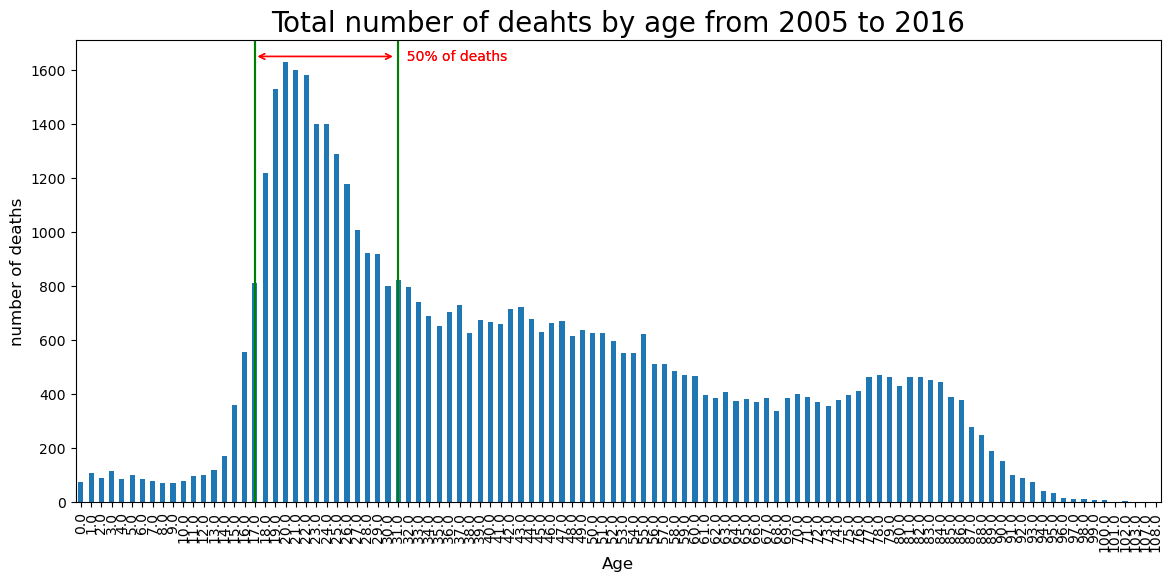

In [21]:
#Visualize the number of deaths by age

pd.DataFrame(deaths)
dplot=deaths.sort_index()
dplot.plot.bar(figsize=(14,6))

plt.annotate('  50% of deaths',
             color='r',
            xy=(17,1650),
            xytext=(31,1635),
            arrowprops=dict(arrowstyle='<->', color='r')
            )

plt.axvline(x=17, color='g', linestyle='-')
plt.axvline(x=31, color='g', linestyle='-')

plt.xlabel('Age', size=12)
plt.ylabel('number of deaths', size=12)
plt.title('Total number of deahts by age from 2005 to 2016', size=20)
plt.show()

People older than 84 are more likely to die with at least 1 out of 10 of the times, rising to beyond 35% in some cases.


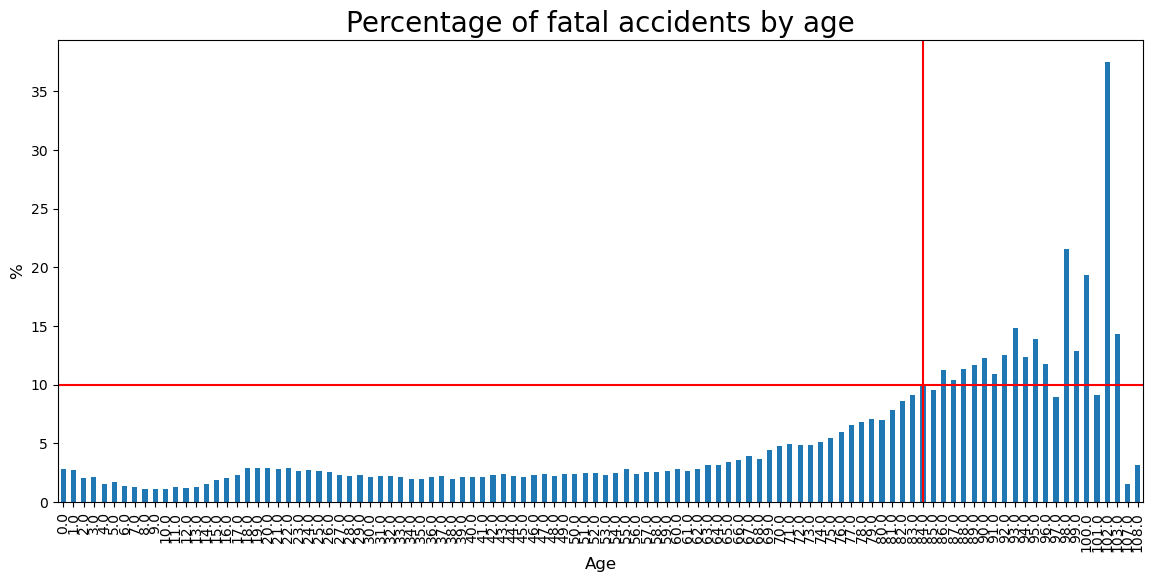

In [24]:
#dead age

death = df2['age'].value_counts().sort_index()
total = df_users['age'].value_counts().sort_index()
death_prop = (deaths/total)*100
d = death_prop.dropna()
minimum = d[d>9.9].index.min()
d.plot.bar(figsize=(14,6))
# plt.xticks(range(108)[0::2])
plt.title('Percentage of fatal accidents by age', size=20)
plt.xlabel('Age', size=12)
plt.ylabel('%', size=12)
plt.axhline(y=10, color='r')
plt.axvline(x=84, color='r')
print('People older than {0:2} are more likely to die\
 with at least 1 out of 10 of the times, rising to beyond 35% in some cases.'.format(int(minimum)))
plt.show()

In [25]:
df_users['crit_age'] = df_users['age'].apply(lambda x: 1 if 17<=x<=31 else 0)
df_users['dead_age'] = df_users['age'].apply(lambda x: 1 if x>84 else 0)

df_users.head()

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age
0,201600000001,1,1,11.0,1983.0,0,33.0,0,0
1,201600000001,1,3,21.0,2001.0,0,15.0,0,0
2,201600000002,1,3,11.0,1960.0,0,56.0,0,0
3,201600000002,2,3,11.0,2000.0,0,16.0,0,0
4,201600000002,2,3,11.0,1962.0,0,54.0,0,0


In [26]:
df2 = df_users.groupby('ID').sum().sort_index(ascending=True)
df2['crit_age1'] = df2['crit_age'].apply(lambda x: 1 if x>0 else 0)
df2['dead_age1'] = df2['dead_age'].apply(lambda x: 1 if x>0 else 0)
df2['ped1'] = df2['ped'].apply(lambda x: 1 if x>0 else 0)
df2['num_us'] = num_users
df2

,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us
ID,,,,,,,,,,,,
200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6
200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2
200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2
200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4
200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
201600059428,4,5,21.0,3994.0,1,38.0,1,0,1,0,1,2
201600059429,1,4,21.0,1984.0,0,32.0,0,0,0,0,0,1
201600059430,2,5,32.0,3972.0,0,60.0,1,0,1,0,0,2


In [27]:
def change_grav(x):
    if x==1 or x==4:
        return 0
    else:
        return 1
df3 = df_users[['ID', 'grav']].copy()
df3['grav'] = df_users['grav'].apply(change_grav)
df3.sort_values(by='ID')

,ID,grav
1678507,200500000001,0
1678512,200500000001,0
1678511,200500000001,0
1678508,200500000001,1
1678509,200500000001,0
...,...,...
133417,201600059431,0
133418,201600059431,0
133421,201600059432,0
133420,201600059432,0


In [28]:
severity = df3[['grav', 'ID']].groupby('ID').max().sort_index(ascending=True)
severity

,grav
ID,
200500000001,1
200500000002,1
200500000003,1
200500000004,1
200500000005,1
...,...
201600059428,0
201600059429,0
201600059430,0


In [29]:
df2['sev'] = severity
df2.reset_index(inplace=True)
df2

,ID,catu,grav,secu,year_birth,ped,age,crit_age,dead_age,crit_age1,dead_age1,ped1,num_us,sev
0,200500000001,10,11,86.0,11901.0,0,129.0,1,0,1,0,0,6,1
1,200500000002,2,4,32.0,3934.0,0,76.0,1,0,1,0,0,2,1
2,200500000003,2,4,42.0,3939.0,0,71.0,1,0,1,0,0,2,1
3,200500000004,5,14,44.0,7779.0,0,241.0,0,1,0,1,0,4,1
4,200500000005,3,7,22.0,3939.0,0,71.0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,201600059428,4,5,21.0,3994.0,1,38.0,1,0,1,0,1,2,0
839981,201600059429,1,4,21.0,1984.0,0,32.0,0,0,0,0,0,1,0
839982,201600059430,2,5,32.0,3972.0,0,60.0,1,0,1,0,0,2,0
839983,201600059431,2,8,42.0,3984.0,0,48.0,2,0,1,0,0,2,0


In [30]:
print('Both data frames having same number of rows is an indicator that any accident has been left behind')
df.shape, df2.shape


Both data frames having same number of rows is an indicator that any accident has been left behind


((839985, 24), (839985, 14))

In [31]:
df = df.merge(df2[['ID','crit_age1', 'ped1','dead_age1', 'num_us', 'sev']], on='ID', how='left')
df

,ID,year,month,day,time,lum,agg,int,atm,col,...,shape,surf,infra,situation,school,crit_age1,ped1,dead_age1,num_us,sev
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,...,3.0,1.0,0.0,1.0,0.0,0,0,0,2,1
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,1
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,...,3.0,2.0,0.0,3.0,99.0,1,1,0,2,1
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,...,1.0,1.0,0.0,1.0,99.0,1,0,0,3,1
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839980,200500087950,5,12,21,2035,5,2,2,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,1,0,0,2,0
839981,200500087951,5,12,23,1010,1,2,1,1.0,3.0,...,2.0,1.0,0.0,1.0,0.0,0,0,0,3,0
839982,200500087952,5,12,26,1715,1,2,2,1.0,3.0,...,1.0,1.0,0.0,1.0,3.0,1,0,0,3,0
839983,200500087953,5,12,27,1500,1,2,3,2.0,5.0,...,1.0,1.0,0.0,1.0,0.0,0,0,0,3,0


In [32]:
from datetime import datetime 

dt = df[['ID','year', 'month', 'day', 'time' ]]
#weekday
date = (dt.year+2000)*10000+dt.month*100+dt.day
dt['date'] = pd.to_datetime(date, format='%Y%m%d')
dt['weekday'] = dt['date'].dt.weekday #weekday functin from datetime gives a number to each day of the week from 0 to 6.

#weekend
dt['weekend'] = dt['weekday'].apply(lambda x: 1 if x>4 else 0)

#night
# dt['night'] = dt['hhmm'].apply(lambda x: 1 if 700>x or x>2100 else 0) 

#holiday
dt.loc[dt.date.isin(df_holi.ds) , 'holiday'] = 1
dt.holiday.fillna(0, inplace=True)
dt.head()

,ID,year,month,day,time,date,weekday,weekend,holiday
0,201600000001,16,2,1,1445,2016-02-01,0,0,0.0
1,201600000002,16,3,16,1800,2016-03-16,2,0,0.0
2,201600000003,16,7,13,1900,2016-07-13,2,0,0.0
3,201600000004,16,8,15,1930,2016-08-15,0,0,1.0
4,201600000005,16,12,23,1100,2016-12-23,4,0,0.0


In [33]:
df = df.merge(dt[['ID', 'date', 'weekend', 'holiday']],on='ID', how='left')
df.drop(['year', 'month', 'day'], axis=1, inplace=True)
df.head()

,ID,time,lum,agg,int,atm,col,lat,long,dep,...,situation,school,crit_age1,ped1,dead_age1,num_us,sev,date,weekend,holiday
0,201600000001,1445,1,2,1,8.0,3.0,0.0,0,590,...,1.0,0.0,0,0,0,2,1,2016-02-01,0,0.0
1,201600000002,1800,1,2,6,1.0,6.0,0.0,0,590,...,1.0,0.0,0,0,0,3,1,2016-03-16,0,0.0
2,201600000003,1900,1,1,1,1.0,6.0,0.0,0,590,...,3.0,99.0,1,1,0,2,1,2016-07-13,0,0.0
3,201600000004,1930,2,2,1,7.0,3.0,0.0,0,590,...,1.0,99.0,1,0,0,3,1,2016-08-15,0,1.0
4,201600000005,1100,1,2,3,1.0,3.0,0.0,0,590,...,1.0,3.0,0,0,0,3,1,2016-12-23,0,0.0


In [34]:
df['time'] = df.time.div(100).apply(np.floor)

In [35]:
df.rename(columns={'crit_age1':'crit_age','dead_age1':'dead_age', 'ped1':'ped'},inplace=True)
df.to_csv('Data.csv')